### 1d

<IPython.core.display.Javascript object>


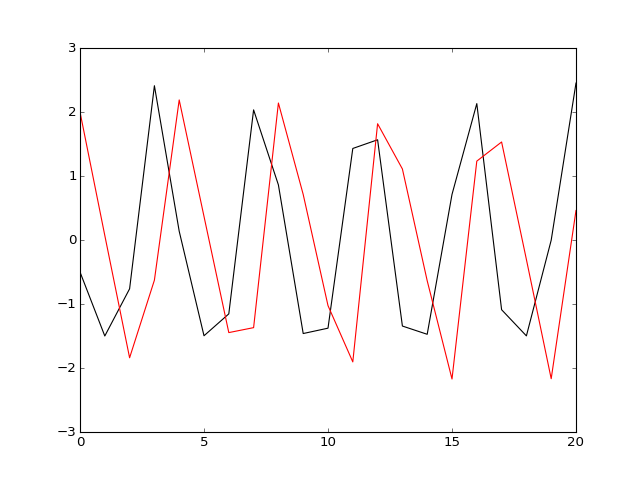

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

TSTEPS = 21
TMAX = 20

def hil(s):
    return np.fft.ifft( -1j * np.fft.fft(s) )

t = np.linspace(0,TMAX,TSTEPS)
s = 2 * np.sin( 1.5 * t ) + 0.5 * np.cos( 3 * t )
s2 = 2 * np.cos( 1.5 * t ) - 0.5 * np.sin( 3 * t )

H = hil(s)

plt.figure()
plt.plot(np.imag(H),'k')
plt.plot(s2,'r')
plt.show()

### 2b

<IPython.core.display.Javascript object>


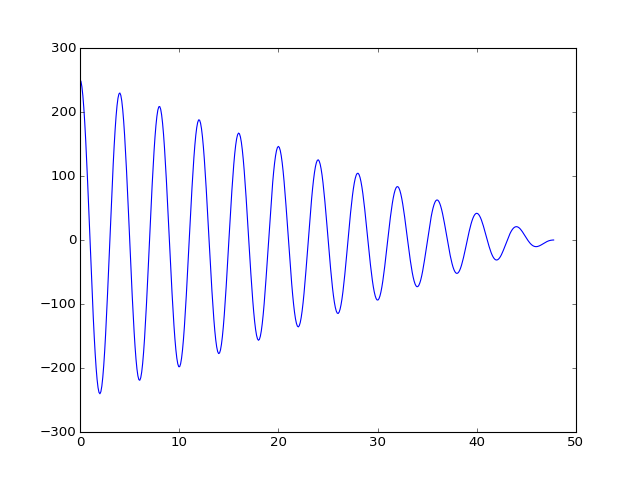

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np



TMAX = 50
delta = 0.1
TSTEPS = TMAX/delta

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

t = np.linspace(0,TMAX,TSTEPS)
s = np.sin(1.5 * t)

a = autocorr(s)
plt.figure()
plt.plot(t/np.pi * 3,a)
plt.show()

### 2c

<IPython.core.display.Javascript object>


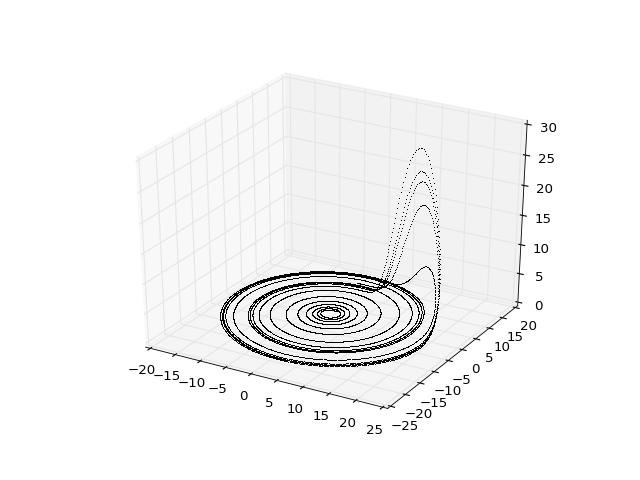

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

NSTEPS = 10

def roessler(t, XYZ):
    X = XYZ[0]
    Y = XYZ[1]
    Z = XYZ[2]
    return [-Y - Z,
           X + 0.1 * Y,
           0.1 + Z * (X - 14)]


def Int(t0,v0):
    r = ode(roessler).set_integrator('dopri5')
    r.set_initial_value( v0, t0)
    t1 = 100
    dt = 0.01
    
    while r.successful() and r.t < t1:
        temp = r.integrate(r.t+dt)
        ax.plot([temp[0]],[temp[1]],[temp[2]],',k')
        
v0 = np.array([1.,1.,1.])
fig = plt.figure()
ax = fig.gca(projection='3d')
Int(0,v0)
plt.show()

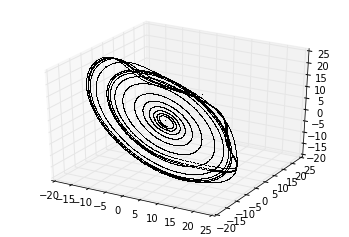

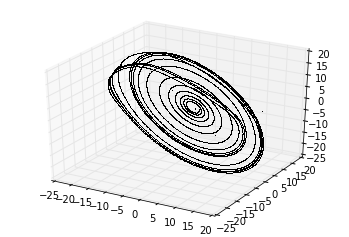

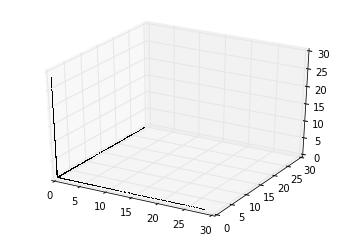

In [35]:
%matplotlib inline

def Signal(t0,v0):
    r = ode(roessler).set_integrator('dopri5')
    r.set_initial_value( v0, t0)
    t1 = 100
    dt = 0.01
    
    result = np.zeros((t1/dt + 1,3))
    while r.successful() and r.t < t1:
        result[r.t / dt,:] = r.integrate(r.t+dt)
    return result

s = Signal(0,v0)
tau = 150
s_shifted1 = s[tau:len(s)-tau,:]
s_shifted2 = s[2*tau:,:]
s = s[:len(s)-2*tau,:]

for x in [0,1,2]:
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(s[:,x],s_shifted1[:,x],s_shifted2[:,x],',k')
    plt.show()


### 2d

<IPython.core.display.Javascript object>


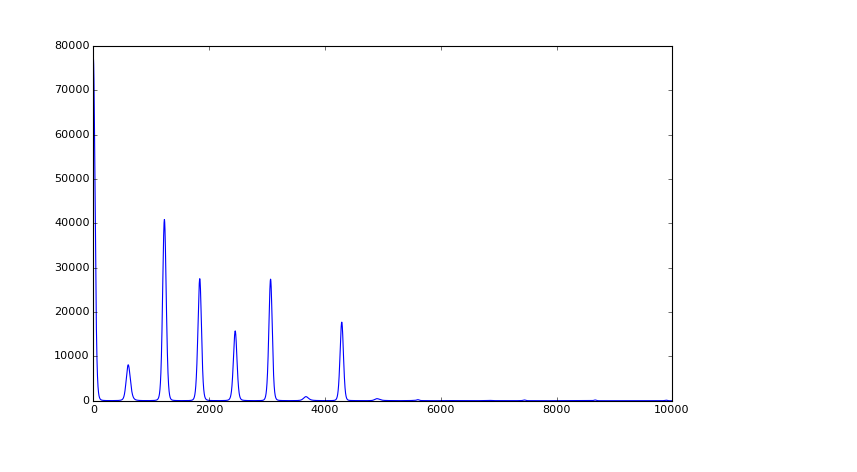

In [36]:
%matplotlib notebook

s = Signal(0,v0)
auto = autocorr(s[:,2])
plt.figure()
plt.plot(auto)
plt.show()